# Regession

The goal of this notebook is to make a time series regression for annual total days, # events, intensity, duration, severity, etc. at the global scale, regional, country and city level

#### Dependencie

In [4]:
import pandas as pd
import geopandas as gpd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm

#### Files

In [5]:
DATA_IN = "/home/cascade/projects/data_out_urbanheat/"  # Note: Need ?dl=1 to make sure this file gets read correctly
FN = 'All_data20191109_final.csv'
df = pd.read_csv(DATA_IN+FN)
FIG_OUT = '/home/cascade/projects/figures/'

# open GHS-UCDB
ghs = gpd.read_file('/home/cascade/tana-crunch-cascade/projects/UrbanHeat/data/raw/GHS_UCDB/GHS_STAT_UCDB2015MT_GLOBE_R2019A_V1_0.shp')


In [ ]:
df.head()

In [30]:
# Add Severity
df['severity'] = df['tot_intensity'] * df['duration']


In [9]:
# Get populuations and area

df_pop = pd.DataFrame()
df_pop['ID_HDC_G0'] = ghs['ID_HDC_G0']
df_pop['AREA'] = ghs['AREA']
df_pop['P75'] = ghs['P75']
df_pop['P90'] = ghs['P90']
df_pop['P00'] = ghs['P00']
df_pop['P15'] =  ghs['P15']
df_pop['geometry'] = ghs['geometry']

df_pop.head(1)

,ID_HDC_G0,AREA,P75,P90,P00,P15,geometry
0,5782,23,76680.40387,77349.278442,75261.170776,69023.903442,"POLYGON ((88.1393063460871 69.36230222917577, ..."


In [10]:
df = df.merge(df_pop, on = 'ID_HDC_G0', how = 'inner')

In [11]:
df.head()

,Unnamed: 0,CTR_MN_NM,Event_ID,GCPNT_LAT,GCPNT_LON,ID_HDC_G0,avg_intensity,avg_temp,duration,event_dates,...,tot_intensity,total_days,year,start_date,AREA,P75,P90,P00,P15,geometry
0,0,Germany,1,48.138002,11.563435,2784,3.859750,44.459750,1,['1983.07.27'],...,3.859750,1,1983,1983.07.27,349,883145.629391,1.097815e+06,1.307097e+06,1.573652e+06,"POLYGON ((11.46764478885785 48.24059688257268,..."
1,1,Germany,763005,48.138002,11.563435,2784,0.058337,40.658337,1,['2013.08.06'],...,0.058337,1,2013,2013.08.06,349,883145.629391,1.097815e+06,1.307097e+06,1.573652e+06,"POLYGON ((11.46764478885785 48.24059688257268,..."
2,2,Germany,4,47.849642,12.102591,2833,6.893180,47.493180,1,['1983.07.27'],...,6.893180,1,1983,1983.07.27,25,58618.272278,6.147326e+04,6.477523e+04,6.497856e+04,"POLYGON ((12.10738143594193 47.87351619009313,..."
3,3,Germany,22703,47.849642,12.102591,2833,1.187350,41.787350,1,['1984.07.11'],...,1.187350,1,1984,1984.07.11,25,58618.272278,6.147326e+04,6.477523e+04,6.497856e+04,"POLYGON ((12.10738143594193 47.87351619009313,..."
4,4,Germany,349979,47.849642,12.102591,2833,0.793425,41.393425,1,['1998.08.11'],...,0.793425,1,1998,1998.08.11,25,58618.272278,6.147326e+04,6.477523e+04,6.497856e+04,"POLYGON ((12.10738143594193 47.87351619009313,..."


# What is the slope of the heat wave characteristics over time?

In [ ]:
data = df.groupby(['year'])['duration'].mean()
plt.plot(data)
plt.title('Global Duration')

In [ ]:
data = df.groupby(['year'])['tot_intensity'].mean()
plt.plot(data)
plt.title('Global Intensity')

In [ ]:
data = df.groupby(['year'])['severity'].mean()
plt.plot(data)
plt.title('Global Severity')

Text(0.5, 1.0, 'Global Frequency per Year')

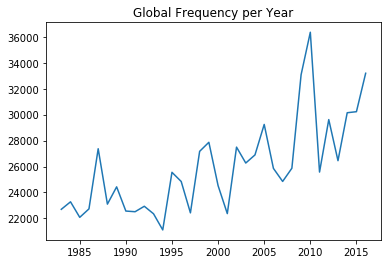

In [99]:
data = df.groupby(['year'])['tot_intensity'].count()
plt.plot(data)
plt.title('Global Frequency per Year')

In [ ]:
data = df.drop_duplicates(['year', 'ID_HDC_G0'], keep = 'first')
data = data.groupby('year')['total_days'].sum()
plt.plot(data)
plt.title('Global Total Days per year >40.6C')

In [ ]:
#### All stacked

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, figsize = (10,16), sharex=True)
fig.suptitle('Characteristics of Urban Extreme Heat Events Globally 1983 - 2016')

# Mean Duration
data = df.groupby(['year'])['duration'].mean()
ax1.plot(data)
ax1.set_title('Mean Duration')
ax1.set_ylabel('Consecutive Days')

# Mean Intensity
data = df.groupby(['year'])['tot_intensity'].mean()
ax2.plot(data)
ax2.set_title('Mean Intensity')
ax2.set_ylabel('Degrees C > 40.6C')

# Mean Severity 
data = df.groupby(['year'])['severity'].mean()
ax3.plot(data)
ax3.set_title('Mean Severity')
ax3.set_ylabel('Duration x Intensity')

# Total Number of Events 
data = df.groupby(['year'])['tot_intensity'].count()
ax4.plot(data)
ax4.set_title('Total Frequency per Year')
ax4.set_ylabel('Number of Events')

# Total Number of Days Per Year 
data = df.drop_duplicates(['year', 'ID_HDC_G0'], keep = 'first')
data = data.groupby('year')['total_days'].sum()
ax5.plot(data)
ax5.set_title('Global Total Days per year >40.6C')
ax5.set_ylabel('Days Per Year')
ax5.set_xlabel('Year')

# Set year axes
for ax in fig.get_axes():
    ax.label_outer()
    
# Fig save
plt.savefig(FIG_OUT+'Fig1_v1')

#### Frequency by region

In [ ]:
# plot by region 
ylabel = 'Frequency of heat waves per year'

fig, ax = plt.subplots(figsize=(8,6))
labels = []
for label, df_c in df.groupby('sub-region'):
    data = df_c.groupby('year')['ID_HDC_G0'].count()
    labels.append(label)
    plt.plot(data, alpha = 0.9)

plt.legend(labels, bbox_to_anchor=(1.04,1), loc="upper left", fontsize = 15)
plt.title('Total of heat wave events of Heat Waves', fontsize = 15)
plt.xlabel('Year', fontsize = 15)
plt.ylabel(ylabel, fontsize = 15)
#plt.ylabel('Number of Heat Waves', fontsize = 15)

#### Duration by region

In [ ]:
# plot by region 
ylabel = 'Annual average duration of heat waves per year'

fig, ax = plt.subplots(figsize=(8,6))
labels = []
for label, df_c in df.groupby('sub-region'):
    data = df_c.groupby('year')['duration'].mean()
    labels.append(label)
    plt.plot(data, alpha = 0.9)

plt.legend(labels, bbox_to_anchor=(1.04,1), loc="upper left", fontsize = 15)
plt.title('Total of heat wave events of Heat Waves', fontsize = 15)
plt.xlabel('Year', fontsize = 15)
plt.ylabel(ylabel, fontsize = 15)
#plt.ylabel('Number of Heat Waves', fontsize = 15)

#### Severity by region

In [ ]:
# plot by region 
ylabel = 'Annual average severity of heat waves per year'

fig, ax = plt.subplots(figsize=(8,6))
labels = []
for label, df_c in df.groupby('sub-region'):
    data = df_c.groupby('year')['severity'].mean()
    labels.append(label)
    plt.plot(data, alpha = 0.9)

plt.legend(labels, bbox_to_anchor=(1.04,1), loc="upper left", fontsize = 15)
plt.title('Annual average severity of heat waves per year', fontsize = 15)
plt.xlabel('Year', fontsize = 15)
plt.ylabel(ylabel, fontsize = 15)
#plt.ylabel('Number of Heat Waves', fontsize = 15)

#### Intensity by region

In [ ]:
# plot by region 
ylabel = 'Annual average total intensity of heat waves per year'

fig, ax = plt.subplots(figsize=(8,6))
labels = []
for label, df_c in df.groupby('sub-region'):
    data = df_c.groupby('year')['tot_intensity'].mean()
    labels.append(label)
    plt.plot(data, alpha = 0.9)

plt.legend(labels, bbox_to_anchor=(1.04,1), loc="upper left", fontsize = 15)
plt.title('Annual average total intensity of heat waves per year', fontsize = 15)
plt.xlabel('Year', fontsize = 15)
plt.ylabel(ylabel, fontsize = 15)
#plt.ylabel('Number of Heat Waves', fontsize = 15)

#### Days per year by region

In [ ]:
# plot by region 
ylabel = 'Avg number of days per year'

fig, ax = plt.subplots(figsize=(8,6))
labels = []
for label, df_c in df.groupby('sub-region'):
    data = df_c.drop_duplicates(['year', 'ID_HDC_G0'], keep = 'first')
    data = data.groupby('year')['total_days'].sum()
    labels.append(label)
    plt.plot(data, alpha = 0.9)

plt.legend(labels, bbox_to_anchor=(1.04,1), loc="upper left", fontsize = 15)
plt.title('Avg total of days per year Tmax >40.6C by city', fontsize = 15)
plt.xlabel('Year', fontsize = 15)
plt.ylabel(ylabel, fontsize = 15)


# Plots by each event start date

In [ ]:
india = df[df['CTR_MN_NM'] == 'India']

In [ ]:
y = india['duration']
x = pd.to_datetime(india['start_date'])

In [ ]:
plt.scatter(x,y, alpha = 0.1)

# Regessions

-- double check this

In [ ]:
from numpy.polynomial.polynomial import polyfit

# make things easier for OLS
regressor = LinearRegression()  

# Geog 
geog = 'CTR_MN_NM'

# Set stat
stats = 'severity'

# Get results

labels = []
r2_list = []
coef_list = []
p_list = []
df_out = pd.DataFrame()

for label, df_c in df.groupby(geog):
    
    # Get Data
    X_year = np.array(df_c.groupby('year')['ID_HDC_G0'].mean().index).reshape((-1, 1))
    Y_stats = np.array(df_c.groupby('year')[stats].count()).reshape((-1, 1))
    
    # Regress
    model = sm.OLS(Y_stats, X_year).fit()
    coef = model.params[0]
    r2 = model.rsquared_adj
    p = model.pvalues[0]
    
    # Make lists
    labels.append(label)
    r2_list.append(r2)
    coef_list.append(coef)
    p_list.append(p)
#     print(label)
#     print(model.summary())
    
# Make data frame
df_out[geog] = labels
df_out['r2'] = r2_list
df_out['slope'] = coef_list
df_out['p_value'] = [round(elem, 4) for elem in p_list]

In [ ]:
print('Reg. results for average annual severity by year 1983 - 2016')
df_out.head(50)

In [ ]:
print(len(df_out))
df_out_sub = df_out[df_out['r2'] > 0]
print(len(df_out_sub))

In [ ]:
plt.hist(df_out_sub['slope'])
plt.title('City-level slope for total number of events increase 1982 - 2016')
plt.xlabel('slope')
plt.ylabel('Number of cities')

In [ ]:
data = df[df[geog] == 'Iraq']
year = np.array(data.groupby('year')['ID_HDC_G0'].mean().index).reshape((-1, 1))
stats = np.array(data.groupby('year')['severity'].mean()).reshape((-1, 1))

In [ ]:
plt.plot(year, stats)

# Population and Area Weighted Totals
see: https://pbpython.com/weighted-average.html

Text(0.5, 1.0, 'Global Duration')

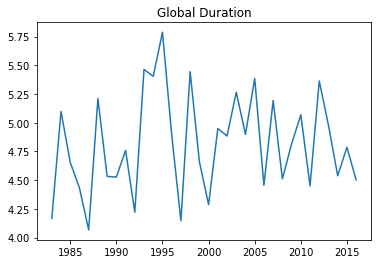

In [22]:
data = df.groupby(['year']).apply(lambda x: np.average(x['duration'], weights=x['P15']))
plt.plot(data)
plt.title('Global Duration')

Text(0.5, 1.0, 'Global Intensity')

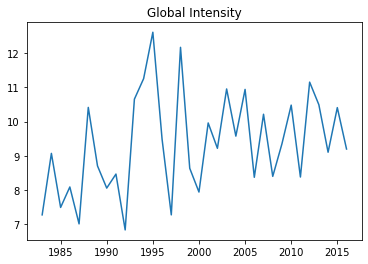

In [45]:
data = df.groupby(['year']).apply(lambda x: np.average(x['tot_intensity'], weights=x['P15']))
plt.plot(data)
plt.title('Global Intensity')

Text(0.5, 1.0, 'Global Severity')

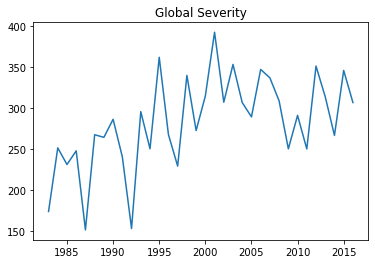

In [31]:
data = df.groupby(['year']).apply(lambda x: np.average(x['severity'], weights=x['P15']))
plt.plot(data)
plt.title('Global Severity')

Text(0.5, 1.0, 'Global Avg Temp')

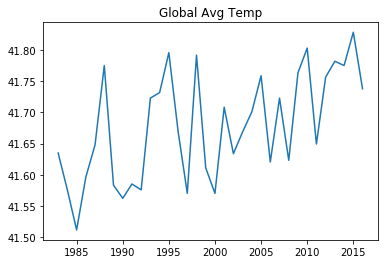

In [32]:
data = df.groupby(['year']).apply(lambda x: np.average(x['avg_temp'], weights=x['P15']))
plt.plot(data)
plt.title('Global Avg Temp')
plt.ylabel('')

In [93]:
df.head()

,Unnamed: 0,CTR_MN_NM,Event_ID,GCPNT_LAT,GCPNT_LON,ID_HDC_G0,avg_intensity,avg_temp,duration,event_dates,...,year,start_date,AREA,P75,P90,P00,P15,geometry,severity,pop_wgt
0,0,Germany,1,48.138002,11.563435,2784,3.859750,44.459750,1,['1983.07.27'],...,1983,1983.07.27,349,883145.629391,1.097815e+06,1.307097e+06,1.573652e+06,"POLYGON ((11.46764478885785 48.24059688257268,...",3.859750,8.254800e-06
1,1,Germany,763005,48.138002,11.563435,2784,0.058337,40.658337,1,['2013.08.06'],...,2013,2013.08.06,349,883145.629391,1.097815e+06,1.307097e+06,1.573652e+06,"POLYGON ((11.46764478885785 48.24059688257268,...",0.058337,8.254800e-06
2,2,Germany,4,47.849642,12.102591,2833,6.893180,47.493180,1,['1983.07.27'],...,1983,1983.07.27,25,58618.272278,6.147326e+04,6.477523e+04,6.497856e+04,"POLYGON ((12.10738143594193 47.87351619009313,...",6.893180,3.408535e-07
3,3,Germany,22703,47.849642,12.102591,2833,1.187350,41.787350,1,['1984.07.11'],...,1984,1984.07.11,25,58618.272278,6.147326e+04,6.477523e+04,6.497856e+04,"POLYGON ((12.10738143594193 47.87351619009313,...",1.187350,3.408535e-07
4,4,Germany,349979,47.849642,12.102591,2833,0.793425,41.393425,1,['1998.08.11'],...,1998,1998.08.11,25,58618.272278,6.147326e+04,6.477523e+04,6.497856e+04,"POLYGON ((12.10738143594193 47.87351619009313,...",0.793425,3.408535e-07


34


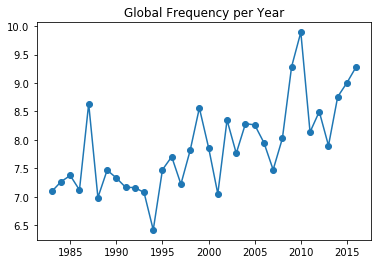

In [111]:
# Weights by pop

df['pop_wgt'] = df['P15'] / df['P15'].sum()


data = pd.DataFrame(df.groupby(['year', 'ID_HDC_G0'])['pop_wgt'].count())
data = data.swaplevel()
data.rename(columns={'pop_wgt':'counts'}, inplace=True)
data.reset_index(level=['year', 'ID_HDC_G0'], inplace=True)
data = data.merge(df[['ID_HDC_G0', 'pop_wgt']], on = 'ID_HDC_G0', how = 'inner')
data['count_wgt'] = data['counts'] * data['pop_wgt']

# plot it 
data = data.groupby('year')['count_wgt'].sum()
plt.plot(data, marker = 'o')
plt.title('Global Frequency per Year')


In [109]:
data = df.drop_duplicates(['year', 'ID_HDC_G0'], keep = 'first')
data

# df['pop_wgt'] = df['P15'] / df['P15'].sum()

# data = data.merge(df[['ID_HDC_G0', 'pop_wgt']], on = 'ID_HDC_G0', how = 'inner')
# # data['days_wgt'] = data['total_days'] * data['pop_wgt']
# data = data.groupby('year')['days_wgt'].sum()
# # plt.plot(data, marker = 'o')
# plt.title('Global Frequency per Year'





# data = data.groupby('year')['total_days'].sum()
# plt.plot(data)
# plt.title('Global Total Days per year >40.6C')

,Unnamed: 0,CTR_MN_NM,Event_ID,GCPNT_LAT,GCPNT_LON,ID_HDC_G0,avg_intensity,avg_temp,duration,event_dates,...,year,start_date,AREA,P75,P90,P00,P15,geometry,severity,pop_wgt
0,0,Germany,1,48.138002,11.563435,2784,3.859750,44.459750,1,['1983.07.27'],...,1983,1983.07.27,349,883145.629391,1.097815e+06,1.307097e+06,1.573652e+06,"POLYGON ((11.46764478885785 48.24059688257268,...",3.859750,8.254800e-06
1,1,Germany,763005,48.138002,11.563435,2784,0.058337,40.658337,1,['2013.08.06'],...,2013,2013.08.06,349,883145.629391,1.097815e+06,1.307097e+06,1.573652e+06,"POLYGON ((11.46764478885785 48.24059688257268,...",0.058337,8.254800e-06
2,2,Germany,4,47.849642,12.102591,2833,6.893180,47.493180,1,['1983.07.27'],...,1983,1983.07.27,25,58618.272278,6.147326e+04,6.477523e+04,6.497856e+04,"POLYGON ((12.10738143594193 47.87351619009313,...",6.893180,3.408535e-07
3,3,Germany,22703,47.849642,12.102591,2833,1.187350,41.787350,1,['1984.07.11'],...,1984,1984.07.11,25,58618.272278,6.147326e+04,6.477523e+04,6.497856e+04,"POLYGON ((12.10738143594193 47.87351619009313,...",1.187350,3.408535e-07
4,4,Germany,349979,47.849642,12.102591,2833,0.793425,41.393425,1,['1998.08.11'],...,1998,1998.08.11,25,58618.272278,6.147326e+04,6.477523e+04,6.497856e+04,"POLYGON ((12.10738143594193 47.87351619009313,...",0.793425,3.408535e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883005,883019,Belize,780003,17.501886,-88.204379,358,0.346198,40.946198,1,['2013.03.24'],...,2013,2013.03.24,17,23608.650234,3.573493e+04,4.801934e+04,7.210068e+04,POLYGON ((-88.23183187681393 17.52586652362516...,0.346198,3.782135e-07
883006,883020,Uganda,849470,3.450930,31.249527,4297,0.063970,40.663970,1,['2015.03.10'],...,2015,2015.03.10,11,7505.349446,1.884974e+04,3.311798e+04,7.380796e+04,"POLYGON ((31.24600217283221 3.478520847599385,...",0.063970,3.871693e-07
883007,883021,Republic of Congo,882655,3.061745,18.516350,3364,1.438155,42.038155,1,['2016.03.01'],...,2016,2016.03.01,8,1.315968,2.035087e+02,3.229776e+03,7.934452e+04,"POLYGON ((18.51531768291171 3.081975229776695,...",1.438155,4.162120e-07
883009,883023,Republic of Congo,882675,2.043653,18.055215,3347,0.815565,41.415565,1,['2016.03.01'],...,2016,2016.03.01,6,3.001908,3.232653e+02,6.700237e+03,1.108782e+05,"POLYGON ((18.04702876683924 2.062528845999172,...",0.815565,5.816260e-07


In [105]:
data

,,total_days
ID_HDC_G0,year,
28,1983,1
29,1983,2
33,1983,1
34,1983,2
35,1983,2
...,...,...
13024,2016,1
13025,2016,1
13027,2016,1


In [ ]:
data = df.drop_duplicates(['year', 'ID_HDC_G0'], keep = 'first')
data = data.groupby('year')['total_days'].sum()
plt.plot(data)
plt.title('Global Total Days per year >40.6C')

df['pop_wgt'] = df['P15'] / df['P15'].sum()


data = pd.DataFrame(df.groupby(['year', 'ID_HDC_G0'])['pop_wgt'].count())
data = data.swaplevel()
data.rename(columns={'pop_wgt':'counts'}, inplace=True)
data.reset_index(level=['year', 'ID_HDC_G0'], inplace=True)
data = data.merge(df[['ID_HDC_G0', 'pop_wgt']], on = 'ID_HDC_G0', how = 'inner')
data['count_wgt'] = data['counts'] * data['pop_wgt']
data = data.groupby('year')['count_wgt'].sum()
plt.plot(data, marker = 'o')
plt.title('Global Frequency per Year'